#  SALES ANALYSIS

### Problem Statement

In the year 2013, a supermarket decided to draw insight from their data in order to make data driven decisions.
As a Data Analyst,you are presented with their 2013 daily sales records (sales_data.csv) and tasked to help them find answers to the questions below by analysing the data.

1. i. What is the average sales and profit per market? 

   ii.Plot a stacked bar chart showing the sales and profit per market.
   
   iii.Which market brings more sales on the average?

2. i. What are the best 10 performing products with regards to sales in 2013?

   ii.What are the least 10 performing products with regards to sales 2013?


3. i. Extract the days and months from the Order Date and add them to the data frame with the name "Days" and "Months" respectively?

   ii.Show the trend of profit from January to December with a line plot.

   iii. Which month does the company make more profit and what 5 products are sold most in that month?
   iv.  which day does the company make high sales on the average?

4. i. By analyzing the data, what is the correlation between sales and discount?

   ii. Use a scatter plot to show the relationship between sales and profit.

5. i. Plot a grouped bar chart showing the total profit for the different product category for each market.
   ii. From your graph, which product category performs well in each market?
   
6. i. Which customer spent the most in the whole year?
   ii. What product does the customer in (i) buy the most?
   iii. Which month did the customer spent the most?
   iv. How much did this customer spend in the whole year?
   
7. Can you do any other analysis to draw more insight? Feel free to do it.








In [100]:
#import your packages here

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns


In [3]:
# Load the sales data here

sales_data=pd.read_csv("sales_data.csv")
sales_data.head()

,Unnamed: 0,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


#### GENERAL INFORMATION ON THE COLUMNS

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13799 non-null  int64  
 1   Order Date     13799 non-null  object 
 2   Order ID       13799 non-null  object 
 3   Customer ID    13799 non-null  object 
 4   Customer Name  13799 non-null  object 
 5   Segment        13799 non-null  object 
 6   City           13799 non-null  object 
 7   Market         13799 non-null  object 
 8   Region         13799 non-null  object 
 9   Category       13799 non-null  object 
 10  Sub-Category   13799 non-null  object 
 11  Product Name   13799 non-null  object 
 12  Sales          13799 non-null  float64
 13  Quantity       13799 non-null  int64  
 14  Discount       13799 non-null  float64
 15  Profit         13799 non-null  float64
dtypes: float64(3), int64(2), object(11)
memory usage: 1.7+ MB


#### GENERAL OBSERVATIONS

1) There exist **no null cells** for all columns

2) The **Order Date column** is an **object** type instead of a **datatime object**

3) The **first column (Unnamed:)** must be made **the index** of the sales_data


### DATA CLEANING

In [5]:
#re_reading the sales_data to correct the observations above

sales_data=pd.read_csv("sales_data.csv",parse_dates=["Order Date"],index_col=0)
sales_data.head()

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.214,7,0.1,36.624
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.280,7,0.0,203.700
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.568,8,0.1,-32.472
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.520,6,0.0,372.060
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.060,7,0.0,340.410


#####  CHECKING FOR DUPLICATE ROWS

In [6]:
row_reapeated_bool=sales_data.duplicated(keep=False)
sales_data.loc[row_reapeated_bool]

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2299,2013-06-06,IN-2013-66265,SF-20200,Sarah Foster,Consumer,Newcastle,APAC,Oceania,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",23.436,1,0.1,9.876
2314,2013-06-06,IN-2013-66265,SF-20200,Sarah Foster,Consumer,Newcastle,APAC,Oceania,Office Supplies,Art,"Stanley Pencil Sharpener, Easy-Erase",23.436,1,0.1,9.876
6095,2013-06-14,ES-2013-2926991,SR-20740,Steven Roelle,Home Office,Madrid,EU,South,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",83.970,3,0.0,27.630
6098,2013-06-14,ES-2013-2926991,SR-20740,Steven Roelle,Home Office,Madrid,EU,South,Office Supplies,Binders,"Wilson Jones 3-Hole Punch, Economy",83.970,3,0.0,27.630
10021,2013-02-23,KE-2013-2790,PC-9000,Pauline Chand,Home Office,Thika,Africa,Africa,Office Supplies,Envelopes,"Cameo Business Envelopes, Set of 50",20.490,1,0.0,8.190
10023,2013-02-23,KE-2013-2790,PC-9000,Pauline Chand,Home Office,Thika,Africa,Africa,Office Supplies,Envelopes,"Cameo Business Envelopes, Set of 50",20.490,1,0.0,8.190


In [7]:
# number of rows before dropping duplicates
no_rows_before=sales_data.shape[0]
print("Number of rows before {}".format(no_rows_before))

#droping the 3 duplicate rows and keeping only one copy of each
sales_data.drop_duplicates(inplace=True,ignore_index=True)

#number of rows after dropping duplicates
no_rows_after=sales_data.shape[0]
print("Number of rows after {}".format(no_rows_after))

Number of rows before 13799
Number of rows after 13796


##### CROSS CHECKING IF ALL DATES ARE WITHIN THE YEAR 2013

In [8]:
#Years must all be within 2013
sales_data["Order Date"].dt.year.value_counts()

2013    13796
Name: Order Date, dtype: int64

In [9]:
#minimum date
sales_data["Order Date"].min()

Timestamp('2013-01-01 00:00:00')

In [10]:
#maximum date
sales_data["Order Date"].max()

Timestamp('2013-12-31 00:00:00')

###### CROSS CHECKING COLUMNS

In [11]:
sales_data["Segment"].unique()

array(['Corporate', 'Consumer', 'Home Office'], dtype=object)

In [12]:
sales_data["Category"].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [13]:
sales_data["Sub-Category"].unique()

array(['Copiers', 'Bookcases', 'Accessories', 'Appliances', 'Storage',
       'Paper', 'Supplies', 'Art', 'Furnishings', 'Labels', 'Chairs',
       'Binders', 'Envelopes', 'Tables', 'Fasteners', 'Phones',
       'Machines'], dtype=object)

In [14]:
sales_data["Market"].unique()

array(['APAC', 'EU', 'Africa', 'Canada', 'EMEA', 'LATAM', 'US'],
      dtype=object)

#### Note: US and Canada belongs to the North America

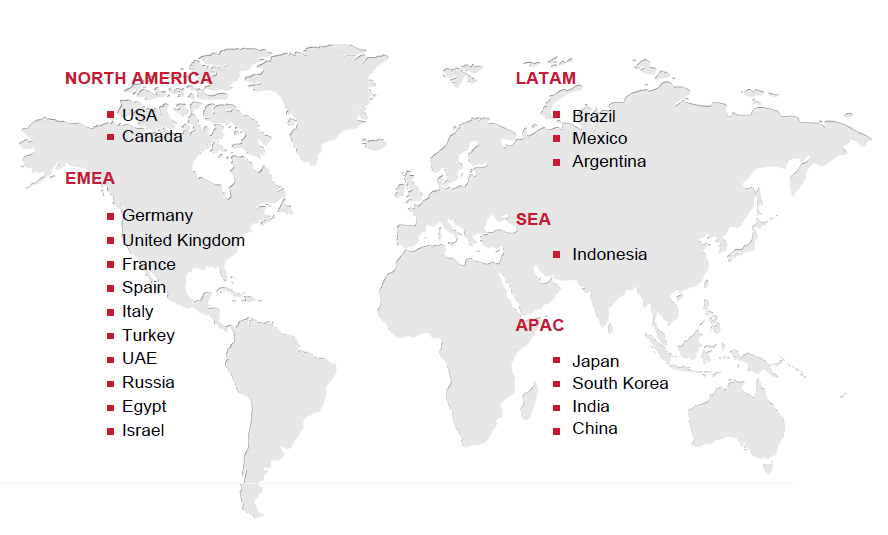

In [15]:
#Cleaning the sales_data["Market"] column to reflect the observation above
usa_canada=(sales_data["Market"]=="US")|(sales_data["Market"]=="Canada")
sales_data.loc[usa_canada,"Market"]="North America"
sales_data["Market"].unique()

array(['APAC', 'EU', 'Africa', 'North America', 'EMEA', 'LATAM'],
      dtype=object)

In [16]:
##### ROUNDING SALES AND PROFIT COLUMNS
sales_data.round(2)

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Copiers,"Canon Copy Machine, Digital",1649.21,7,0.1,36.62
1,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Metal",1358.28,7,0.0,203.70
2,2013-01-01,ID-2013-37383,MY-18295,Muhammed Yedwab,Corporate,Albury,APAC,Oceania,Technology,Accessories,"Logitech Memory Card, Erganomic",728.57,8,0.1,-32.47
3,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Dania Library with Doors, Mobile",2189.52,6,0.0,372.06
4,2013-01-01,IN-2013-47960,JE-15715,Joe Elijah,Consumer,Tianjin,APAC,North Asia,Furniture,Bookcases,"Sauder Floating Shelf Set, Traditional",1362.06,7,0.0,340.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13791,2013-12-31,TU-2013-9400,TM-11490,Tony Molinari,Consumer,Gaziantep,EMEA,EMEA,Furniture,Furnishings,"Eldon Light Bulb, Black",10.08,1,0.6,-5.55
13792,2013-12-31,CA-2013-163951,CJ-11875,Carl Jackson,Corporate,Philadelphia,North America,East,Office Supplies,Art,Newell 31,16.52,5,0.2,1.65
13793,2013-12-31,US-2013-111528,JP-16135,Julie Prescott,Home Office,Los Angeles,North America,West,Office Supplies,Binders,Cardinal Hold-It CD Pocket,6.38,1,0.2,2.15
13794,2013-12-31,CA-2013-117660,BM-11785,Bryan Mills,Consumer,Columbus,North America,East,Office Supplies,Labels,Avery 487,5.90,2,0.2,1.99


## QUESTION 1

#### AVERAGE SALES AND PROFIT BY MARKET

In [17]:
#checking for the unique market names and their overall number of sales transacted
sales_data["Market"].value_counts()

LATAM            3060
APAC             2889
North America    2686
EU               2560
EMEA             1308
Africa           1293
Name: Market, dtype: int64

In [18]:
#Cleaning the sales_data["Market"] column to reflect the observation above
usa_canada=(sales_data["Market"]=="US")|(sales_data["Market"]=="Canada")
sales_data.loc[usa_canada,"Market"]="North America"
sales_data["Market"].value_counts()

LATAM            3060
APAC             2889
North America    2686
EU               2560
EMEA             1308
Africa           1293
Name: Market, dtype: int64

In [19]:
avg_profit_sales=sales_data.groupby("Market").mean()[["Sales","Profit"]]
avg_profit_sales=avg_profit_sales.round(2).sort_values(["Sales"],ascending=False)
avg_profit_sales

,Sales,Profit
Market,,
APAC,337.33,42.61
EU,297.50,38.38
North America,233.67,32.34
LATAM,198.74,20.07
Africa,177.14,20.63
EMEA,156.45,8.10


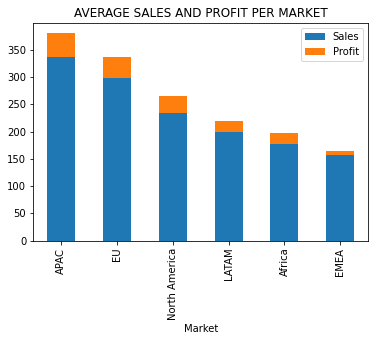

In [20]:
avg_profit_sales.plot(kind="bar",stacked=True,title="AVERAGE SALES AND PROFIT PER MARKET")
plt.show()

#### OBSERVATIONS

Amongst the 7 markets, **APAC representing the Asia-Pacific region** brings in more sales and generates the highest Profit on average.

The average sales seems to correlate with the average profit ,except in the case of **AFRICA**

In [21]:
# confirming correlation between average sales and average profit
avg_profit_sales.corr()

,Sales,Profit
Sales,1.000000,0.953469
Profit,0.953469,1.000000


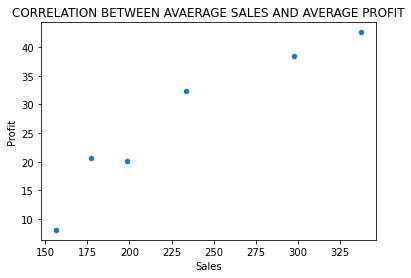

In [22]:
avg_profit_sales.plot.scatter("Sales","Profit")
plt.title("CORRELATION BETWEEN AVAERAGE SALES AND AVERAGE PROFIT")
plt.show()

In [23]:
# confirming correlation between overall sales and overall profit

sales_data.corr().loc[["Sales","Profit"],["Sales","Profit"]]

,Sales,Profit
Sales,1.000000,0.521414
Profit,0.521414,1.000000


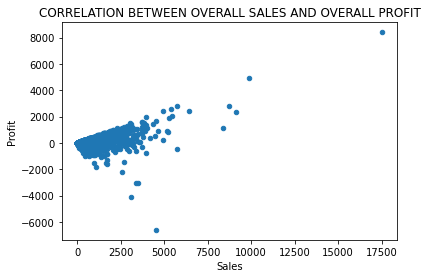

In [24]:
sales_data.plot.scatter("Sales","Profit")
plt.title("CORRELATION BETWEEN OVERALL SALES AND OVERALL PROFIT")
plt.show()

#### OBSERVATIONS

Generally Sales seems to  correlate with Profit. Average Sales and Average Profit correlates almost perfectly.This implies that the higher the sales the more likely the profit might be higher or more.

## QUESTION 2

#### TOP 10 BEST AND LEAST PURCHASED PRODUCTS WITH REGARDSTO SALES FOR 2013

In [25]:
#BEST 10 products based on the total sales

product_analysis=sales_data.groupby("Product Name").sum()[["Sales","Quantity","Profit"]].sort_values("Sales",ascending=False).round(0)
product_analysis

,Sales,Quantity,Profit
Product Name,,,
"Motorola Smart Phone, Full Size",29357.0,50,7529.0
"Cisco Smart Phone, Full Size",26737.0,49,6305.0
Canon imageCLASS 2200 Advanced Copier,25900.0,9,9520.0
"Harbour Creations Executive Leather Armchair, Adjustable",21871.0,57,6425.0
"Apple Smart Phone, Full Size",21120.0,45,-481.0
...,...,...,...
"Acco Banker's Clasps, 5 3/4""-Long",2.0,1,1.0
Maxell 4.7GB DVD+R 5/Pack,2.0,2,1.0
Avery Durable Binders,2.0,3,-3.0


##### TOP 10

In [26]:
product_analysis.merge(sales_data,how="left",on="Product Name").drop_duplicates(subset="Product Name",ignore_index=True)[["Product Name","Category","Sub-Category"]].set_index(["Product Name"]).head(10)

,Category,Sub-Category
Product Name,,
"Motorola Smart Phone, Full Size",Technology,Phones
"Cisco Smart Phone, Full Size",Technology,Phones
Canon imageCLASS 2200 Advanced Copier,Technology,Copiers
"Harbour Creations Executive Leather Armchair, Adjustable",Furniture,Chairs
"Apple Smart Phone, Full Size",Technology,Phones
"Hon Executive Leather Armchair, Adjustable",Furniture,Chairs
"Office Star Executive Leather Armchair, Adjustable",Furniture,Chairs
"Nokia Smart Phone, with Caller ID",Technology,Phones
"Samsung Smart Phone, VoIP",Technology,Phones


##### OBSERVATIONS

**70%** of the top 10 products based on total sales falls within the **Technology Category** and the remaining **30%** within the **Furniture Category**

##### LEAST 10

In [27]:
product_analysis.merge(sales_data,how="left",on="Product Name").drop_duplicates(subset="Product Name",ignore_index=True)[["Product Name","Category","Sub-Category"]].set_index(["Product Name"]).tail(10)

,Category,Sub-Category
Product Name,,
"Crayola Anti Dust Chalk, 12/Pack",Office Supplies,Art
Newell 32,Office Supplies,Art
"Eldon Spacemaker Box, Quick-Snap Lid, Clear",Office Supplies,Art
Acco 3-Hole Punch,Office Supplies,Binders
Avery 479,Office Supplies,Labels
"Acco Banker's Clasps, 5 3/4""-Long",Office Supplies,Fasteners
Maxell 4.7GB DVD+R 5/Pack,Technology,Accessories
Avery Durable Binders,Office Supplies,Binders
"OIC #2 Pencils, Medium Soft",Office Supplies,Art


##### OBSERVATIONS

**90%** of the least 10 products based on total sales falls within the **Office Supply Category** and the remaining **10%** within the **Technology Category**

**Note**: Overall it should be noted that **Total Sales per Product Name** doesnt correlate with **Total Profit**

## QUESTION 3

In [28]:
# Extracting day and month

sales_data["Days"]=sales_data["Order Date"].dt.strftime("%A")
sales_data["Months"]=sales_data["Order Date"].dt.strftime("%B")
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13796 entries, 0 to 13795
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     13796 non-null  datetime64[ns]
 1   Order ID       13796 non-null  object        
 2   Customer ID    13796 non-null  object        
 3   Customer Name  13796 non-null  object        
 4   Segment        13796 non-null  object        
 5   City           13796 non-null  object        
 6   Market         13796 non-null  object        
 7   Region         13796 non-null  object        
 8   Category       13796 non-null  object        
 9   Sub-Category   13796 non-null  object        
 10  Product Name   13796 non-null  object        
 11  Sales          13796 non-null  float64       
 12  Quantity       13796 non-null  int64         
 13  Discount       13796 non-null  float64       
 14  Profit         13796 non-null  float64       
 15  Days           1379

#### PROFIT TREND FROM JANUARY TO DECEMBER

In [29]:
sales_by_month=sales_data.groupby("Months").sum().reset_index()
sales_by_month

,Months,Sales,Quantity,Discount,Profit
0,April,233181.34844,3161,127.946,26008.05144
1,August,323876.60716,4564,185.740,32977.75576
2,December,371245.40880,5005,205.932,47654.27990
3,February,191042.28216,2534,101.234,31545.80756
4,January,206459.19582,2766,110.106,26052.40252
5,July,223642.65664,3594,141.910,27019.91294
6,June,341054.93770,4944,192.006,43261.34400
7,March,230547.79468,3130,136.134,34873.71938
8,May,304509.96336,4115,159.898,39053.30946
9,November,383039.21248,5274,190.164,51720.88568


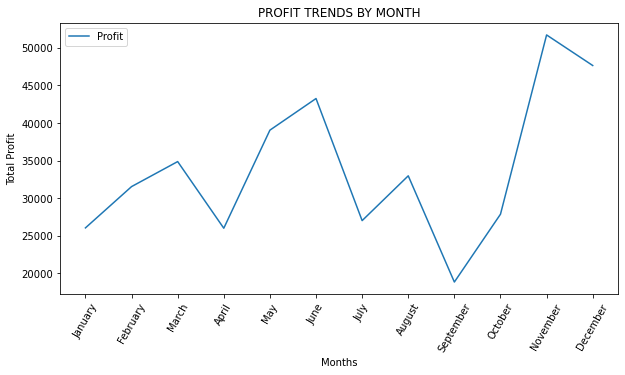

In [30]:

month_code={"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8,"September":9,"October":10,"November":11,"December":12}
sales_by_month["Months_Code"]=sales_by_month["Months"].replace(month_code)
sales_by_month.sort_values('Months_Code')[["Months","Profit"]].set_index("Months").plot(figsize=(10,5))
plt.title("PROFIT TRENDS BY MONTH")
plt.xticks(np.arange(12),month_code.keys(),rotation=60)
plt.ylabel("Total Profit")
plt.show()

##### OBSERVATION
The company makes the most total profit in the month of November

In [44]:
# top 5 products are sold most in that month of November (represented by 11)

sales_data.loc[sales_data["Months"]=="November"]["Product Name"].value_counts().head(5)

OIC Staples, Assorted Sizes               5
Advantus Stacking Tray, Erganomic         5
Smead File Cart, Single Width             5
Office Star Steel Folding Chair, Black    5
Acco 3-Hole Punch, Economy                4
Name: Product Name, dtype: int64

In [45]:
sales_data.loc[sales_data["Months"]=="November"]["Category"].value_counts()

Office Supplies    888
Technology         319
Furniture          284
Name: Category, dtype: int64

In [46]:
sales_data.loc[sales_data["Months"]=="November"]["Sub-Category"].value_counts().head(5)

Binders    197
Storage    148
Phones     126
Art        111
Paper      106
Name: Sub-Category, dtype: int64

#### AVERAGE SALES PER DAY

In [34]:
sales_by_day=sales_data.groupby("Days").mean()['Sales'].reset_index()
sales_by_day

,Days,Sales
0,Friday,234.991626
1,Monday,252.200578
2,Saturday,246.496894
3,Sunday,264.273374
4,Thursday,245.423070
5,Tuesday,254.789367
6,Wednesday,240.413129


In [35]:
day_code={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
sales_by_day["Day Code"]=sales_by_day["Days"].replace(day_code)

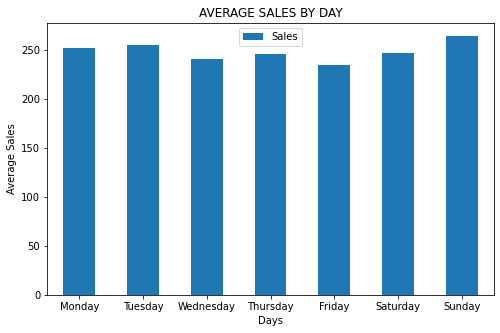

In [36]:
sales_by_day.sort_values("Day Code")[["Days","Sales"]].set_index("Days").plot(kind="bar",figsize=(8,5))
plt.title("AVERAGE SALES BY DAY")
plt.xticks(rotation=0)
plt.ylabel("Average Sales")
plt.legend(loc=9)
plt.show()

##### OBSERVATION

1) Even though **Sunday** is **a bit high** compared to the other days,average Sale is relatively the **same** across the days. Average Sales for all days are above 200.

2) it is a bit strange to have a non_working day(Sunday) having the most sales. 


## QUESTION 4

#### CORRELATION BETWEEN SALES AND DISCOUNT

In [37]:
#checking pearson's correlation value (the closer the value to 1 or -1 the higher the correlation)
sales_discount_corr=sales_data["Sales"].corr(sales_data["Discount"])

print(f"This correlation value {round(sales_discount_corr,2)} indicates a weak negative correlation")

This correlation value -0.08 indicates a weak negative correlation


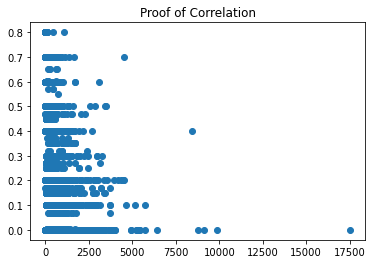

In [38]:
plt.scatter(sales_data["Sales"],sales_data["Discount"])
plt.title("Proof of Correlation")
plt.show()

## QUESTION 5

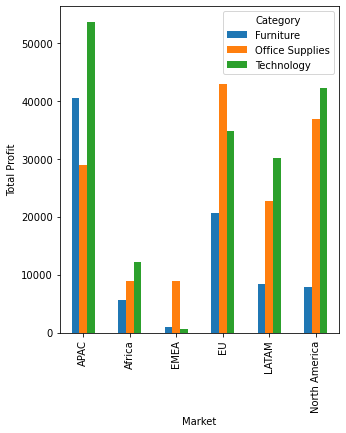

In [39]:
df_pivot = pd.pivot_table(
    sales_data, 
    values="Profit",
    index="Market",
    columns="Category", 
    aggfunc=sum).plot(kind="bar",figsize=(5,6))
plt.ylabel("Total Profit")
plt.show()

##### OBSERVATIONS

For all the markets except **EMEA(Europe, Middle East, and Africa) and EU(Europe)** have the **Technology category** as the most dominant in terms of total profit. That of **EMEA(Europe, Middle East, and Africa) and EU(Europe)** is **Office Supplies**

. Which customer spent the most in the whole year? ii. What product does the customer in (i) buy the most? iii. Which month did the customer spent the most? iv. How much did this customer spend in the whole year?

Can you do any other analysis to draw more insight? Feel free to do it.

## QUESTION 6

In [47]:
#### HIGHEST SPENDER DETAILS

In [48]:
#Top 10 customers by Money Spent
sales_data.groupby("Customer ID").sum().sort_values("Sales",ascending=False).round(2).head(10).style.format('{:,}')

,Sales,Quantity,Discount,Profit
Customer ID,,,,
TC-20980,"23,036.99",78,3.8,"8,485.91"
CC-12370,"18,195.99",81,4.05,"3,750.71"
LB-16795,"16,271.59",104,6.1,"2,951.04"
JE-15715,"16,262.58",155,6.21,"2,619.89"
SE-20110,"15,527.93",112,2.54,"3,193.28"
SP-20920,"15,258.14",83,3.3,"3,542.42"
CM-11830,"12,983.8",127,3.57,"1,808.17"
ZC-21910,"12,518.47",109,5.57,"-1,708.93"
KD-16270,"12,470.58",85,1.1,"4,115.36"


In [49]:
#Purchase Details for the Highest Customer who spend the most
highest_spender=sales_data[sales_data["Customer ID"]=="TC-20980"]
highest_spender

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Days,Months
1103,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,North America,Central,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,Sunday,March
1107,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,North America,Central,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.980,2,0.0,331.1910,Sunday,March
1133,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,North America,Central,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,33.960,2,0.0,9.5088,Sunday,March
1136,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,North America,Central,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,Sunday,March
1139,2013-03-10,CA-2013-118689,TC-20980,Tamara Chand,Corporate,Lafayette,North America,Central,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",34.370,7,0.0,16.8413,Sunday,March
3408,2013-08-10,MX-2013-124667,TC-20980,Tamara Chand,Corporate,Sonsonate,LATAM,Central,Office Supplies,Art,"Sanford Markers, Water Color",158.580,9,0.0,39.6000,Saturday,August
3936,2013-09-12,MX-2013-113124,TC-20980,Tamara Chand,Corporate,Bogotá,LATAM,South,Technology,Accessories,"Enermax Keyboard, Programmable",169.920,3,0.0,15.2400,Thursday,September
6739,2013-11-15,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Technology,Phones,"Nokia Smart Phone, with Caller ID",1022.256,4,0.4,-0.0640,Friday,November
6740,2013-11-15,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1093.248,6,0.4,-328.0320,Friday,November
6764,2013-11-15,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Office Supplies,Storage,"Tenex Lockers, Single Width",245.016,3,0.4,-85.7640,Friday,November


In [42]:
highest_spender.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,15,16]].describe().loc[["count","unique","top","freq"]]

,Order Date,Order ID,Customer ID,Customer Name,Segment,City,Market,Region,Category,Sub-Category,Product Name,Days,Months
count,22,22,22,22,22,22,22,22,22,22,22,22,22
unique,7,7,1,1,1,7,4,5,3,11,22,6,5
top,2013-11-15 00:00:00,US-2013-164119,TC-20980,Tamara Chand,Corporate,Tegucigalpa,LATAM,Central,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,Friday,November
freq,9,9,22,22,22,9,11,15,15,5,1,9,13


##### OBSERVATIONS

1) **Tamara Chand** is the company that spend the most

2) **Office Supplies** specifically **Binders** is bought the most by Tamara Chand

3) Tamara Chand spent the most in the month of **November**  and spent approximately **Ghc23,037** on purchases in 2013

## EXTRAS


#### SEGEMENT BREAKDOWN

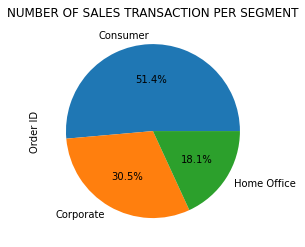

In [99]:
#number of sales transacted  per segment
sales_data.groupby("Segment").count()["Order ID"].plot.pie(autopct='%1.1f%%')
plt.title("NUMBER OF SALES TRANSACTION PER SEGMENT")
plt.show()

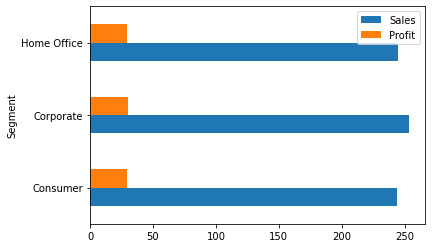

In [77]:
# segement breakdown by sales and profit
sales_data.groupby("Segment").mean().round(2)[["Sales","Profit"]].plot.barh()
plt.show()

In [109]:
#overall number of customers
overall_customers_number=sales_data["Customer ID"].unique().shape[0]
print("The company had {} number of customers for the year 2013".format(overall_customers_number))


The company had 1458 number of customers for the year 2013
